## Exercise 1: GD on a 1D Function

Consider the 1-dimensional function

$$
\mathcal{L}(\Theta)  = (\Theta - 3)^2 + 1.
$$


1. **Compute the Gradient** of $\mathcal{L}(\Theta)$ explicitly.

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def l(theta):
    return (theta - 3) **2 + 1

def grad_l(theta):
    return 2 * (theta - 3)

2. **Implement the Gradient Descent** to optimize $\mathcal{L}(\Theta)$ following what we introduced on the theoretical sections.


In [58]:
def GD(l, grad_l, theta_0, eta, maxit):

    theta_vals = [theta_0]
    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta_0)
        theta_0 = theta

        theta_vals.append(theta)

    return theta, np.array(theta_vals)

3. Test three different constant step sizes:
   - $\eta = 0.05$  
   - $\eta = 0.2$
   - $\eta = 1.0$

In [59]:
sp = 0

theta_005, traj_005 = GD(l, grad_l, theta_0 = sp, eta = 0.05, maxit = 100)
theta_02, traj_02 = GD(l, grad_l, theta_0 = sp, eta = 0.2, maxit = 100)
theta_1, traj_1 = GD(l, grad_l, theta_0 = sp, eta = 1, maxit = 100)

etas = [0.05, 0.2, 1.0]



4. For each choice:
   - Plot the sequence $\Theta^{(k)}$ on the real line (i.e. draw a line and represent, on top of it, the position of all the successive elements $\Theta^{(k)}$).  
   - Plot the function values $\mathcal{L}(\Theta^{(k)})$ vs iteration.  
   - Comment on convergence, oscillations, and divergence.

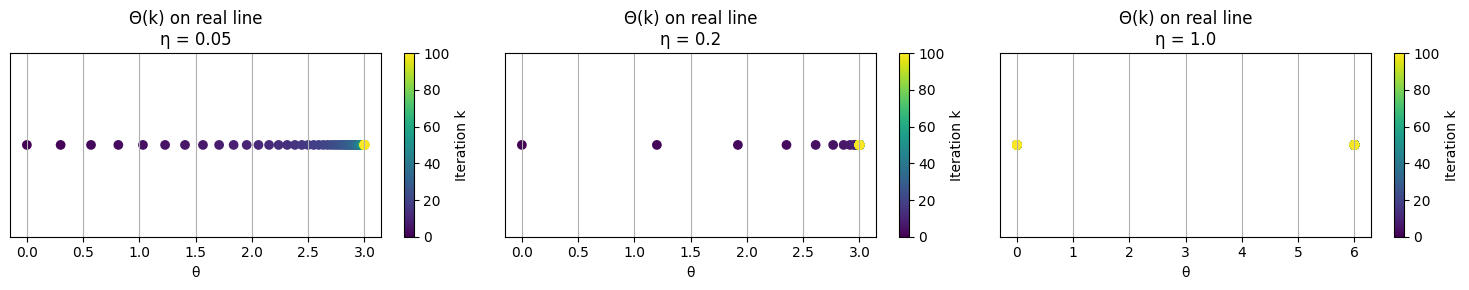

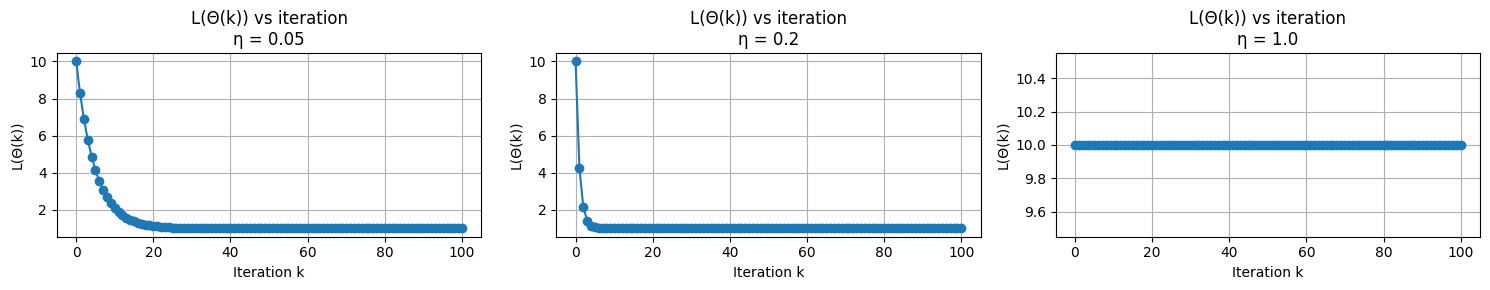

In [60]:
trajectories = {
    0.05: traj_005,
    0.2: traj_02,
    1.0: traj_1
}

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for i, (eta, thetas) in enumerate(trajectories.items()):
    ax = axes[i]
    sc = ax.scatter(thetas, np.zeros_like(thetas), c=range(len(thetas)), cmap='viridis')
    ax.set_title(f"Θ(k) on real line\nη = {eta}")
    ax.set_xlabel("θ")
    ax.set_yticks([])
    ax.grid(True)
    fig.colorbar(sc, ax=ax, label='Iteration k')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for i, (eta, thetas) in enumerate(trajectories.items()):
    ax = axes[i]
    L_vals = l(thetas)
    ax.plot(L_vals, marker='o')
    ax.set_title(f"L(Θ(k)) vs iteration\nη = {eta}")
    ax.set_xlabel("Iteration k")
    ax.set_ylabel("L(Θ(k))")
    ax.grid(True)

plt.tight_layout()
plt.show()

With n = 0.05, the convergence is slow but stable, the updates are small, the function values decrease steadily, gradient descent converges to the minimum without oscillations.

With n = 0.2, the convergence is faster and still stable, the updates are larger, the function values decrease more rapidly, gradient descent converges to the minimum without oscillations.

With n = 1.0, the step size is TOO LARGE, the function values oscillate significantly, gradient descent diverges and does not converge to the minimum.

5. Relate your observations to the discussion in class about:
   - step-size being too small / too large,
   - the role of convexity,
   - how the “just right” step size leads to fast convergence.

*Hint:* This function is strictly convex with a unique minimizer at $\Theta^* = 3$.


The results show the behaviour of gradient descent on a convex function.

If the step size is too small, convergence is slow, the GD algorithm needs more iterations to reach the minimum.

If the step size is too large, the algorithm diverges, oscillating around the minimum without converging.

Since the function is strictly convex, it has a single global minimum at $\Theta^* = 3$, so the convergence depends only on the step size, not on the initial point. Of course, starting closer to the minimum would reduce the number of iterations needed to converge.

With an intermediate step size, convergence is fast and stable, reaching the minimum in fewer iterations.



## Exercise 2: Backtracking Line Search

Consider the non-convex function

$$
\mathcal{L}(\Theta)  = \Theta^4 - 3\Theta^2 + 2.
$$

1. Implement **Gradient Descent with Backtracking**, using the Armijo condition, considering the `backtracking(...)` function from class.


In [66]:
def l(theta):
    return theta**4 - 3*(theta**2) + 2
def grad_l(theta):
    return 4*(theta**3) - 6*(theta)

def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

def GD_backtracking(l, grad_l, theta_0, maxit, tolL, toltheta):
    thetas = [theta_0] 
    for k in range(maxit):
        eta = backtracking(l, grad_l, theta_0)
        theta = theta_0 - eta * grad_l(theta_0)
        thetas.append(theta)

        if (np.linalg.norm(grad_l(theta)) < tolL) or (np.linalg.norm(theta - theta_0) < toltheta):
            break

        theta_0 = theta
    return theta, np.array(thetas), k

2. Test different initial points:
   - $\Theta_0 = -2$
   - $\Theta_0 = 0.5$
   - $\Theta_0 = 2$


In [78]:
thetas_0 = [-2, 0.5, 2]
results = {}

for theta_0 in thetas_0:
    theta_final, traj, k = GD_backtracking(l, grad_l, theta_0 = theta_0, maxit = 1000, tolL = 1e-6, toltheta = 1e-6)
    results[theta_0] = {"final": theta_final, "trajectory": traj, "iters": k}
    print(f"Theta₀ = {theta_0}: converged to θ* = {theta_final:.5f} in {k} iterations")



Theta₀ = -2: converged to θ* = 1.22474 in 19 iterations
Theta₀ = 0.5: converged to θ* = 1.22474 in 18 iterations
Theta₀ = 2: converged to θ* = -1.22474 in 19 iterations



3. For each starting point, plot:
   - the function curve $\mathcal{L}(\Theta)$ in 1D in the domain $[-3, 3]$,
   - the trajectory of the iterates $\Theta^{(k)}$ overlaid on the curve.



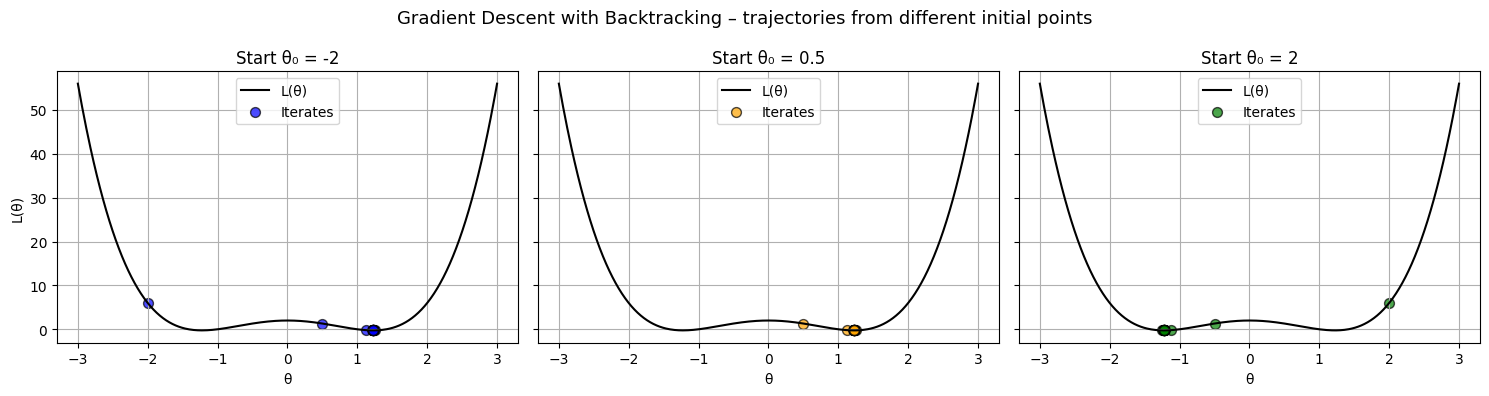

In [79]:
theta_vals = np.linspace(-3, 3, 400)
L_vals = l(theta_vals)

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
colors = ['blue', 'orange', 'green']

for i, theta_0 in enumerate(thetas_0):
    ax = axes[i]
    traj = results[theta_0]["trajectory"]

    ax.plot(theta_vals, L_vals, 'k-', label='L(θ)')

    ax.scatter(traj, l(traj), color=colors[i], alpha=0.7, s=50, edgecolors='k', label='Iterates')

    ax.set_title(f"Start θ₀ = {theta_0}")
    ax.set_xlabel("θ")
    if i == 0:
        ax.set_ylabel("L(θ)")
    ax.legend()
    ax.grid(True)

plt.suptitle("Gradient Descent with Backtracking – trajectories from different initial points", fontsize=13)
plt.tight_layout()
plt.show()


4. Discuss:
   - Why different initializations converge to different minima.  
   - How backtracking automatically chooses a suitable step size at each iteration.  
   - Situations where constant step size would fail.
  


The function is non-convex and has two symmetric minima.

GD always moves downhill, so the starting point determines which minima the algorithm falls into. Starting on one side of the central peak leads to the nearest minimum on that side, that is, unless a large step crosses a local maximum, as can happen with backtracking.

Backtracking line search tests progressively smaller step sizes until it finds one that gives a sufficient decrease in 
𝐿. Large steps are accepted in flat regions for faster progress, and smaller ones near steep or curved areas.

A fixed step that’s too small makes learning slow, while one that’s too large can diverge, especially on non-convex landscapes.

### ⚠️ Example: when a constant step size fails
Given our function:
$$L(\theta) = \theta^4 - 3\theta^2 + 2, \qquad \nabla L(\theta) = 4\theta^3 - 6\theta.$$

Choosing a **constant step size** $ \eta = 0.5 $ and starting at $ \theta_0 = 2 $.

---

**First step:**

$$\nabla L(2) = 4(2)^3 - 6(2) = 32 - 12 = 20$$

$$\theta_1 = \theta_0 - \eta \nabla L(\theta_0) = 2 - 0.5(20) = -8$$
---

**Function values:**

$$L(2) = 16 - 12 + 2 = 6, \qquad L(-8) = (-8)^4 - 3(-8)^2 + 2 = 4096 - 192 + 2 = 3906$$

The loss **increases from 6 to 3906**, meaning gradient descent has **diverged** in a single step.
This happens because the step size is too large, instead backtracking would have reduced it to ensure a decrease in the loss using the Armijo condition.